In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.display import set_matplotlib_formats, Image, display
from loaders import load_all_videos, load_thumbnails, each_thumbnail

%matplotlib inline
# set_matplotlib_formats('svg')

def imshow(im):
    _,ret = cv2.imencode('.png', im)
    i = Image(data=ret)
    display(i)

In [2]:
vids = load_all_videos()
load_thumbnails(vids)

100%|██████████| 8607/8607 [00:01<00:00, 5674.75it/s]

Downloaded: 0
Broken links: 0
Already present: 7928
Skipped: 679


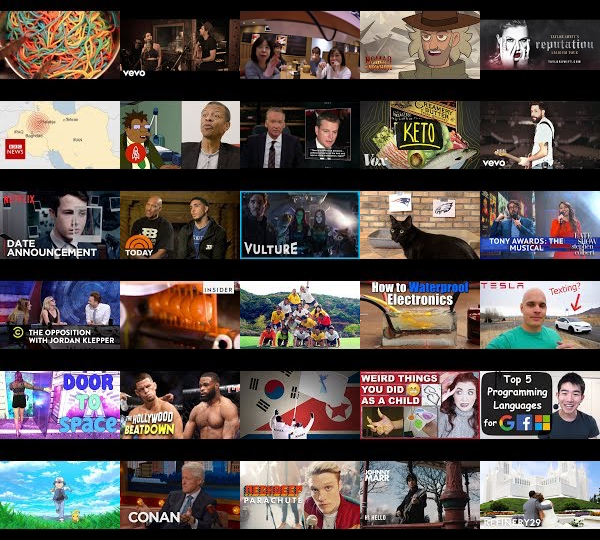

In [33]:
rows = 10
cols = 10
sample = list(each_thumbnail(rows * cols))
w, h, d = sample[0].shape
collage = np.array(sample).reshape(rows, cols, w, h, d).swapaxes(1, 2).reshape(rows * w, cols * h, d)
imshow(collage)

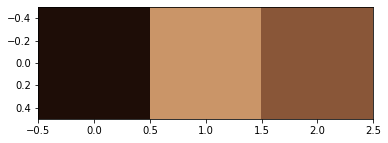

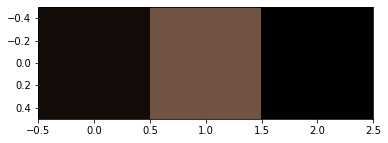

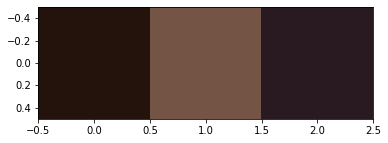

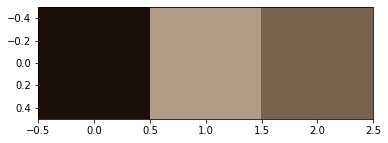

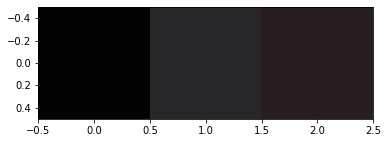

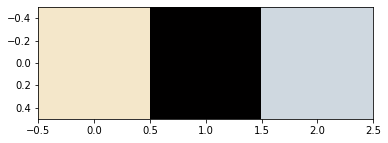

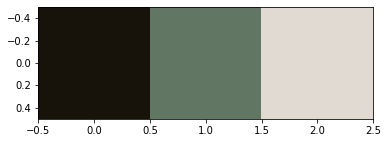

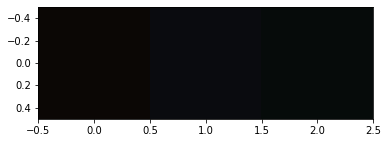

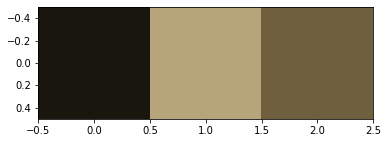

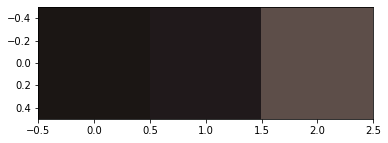

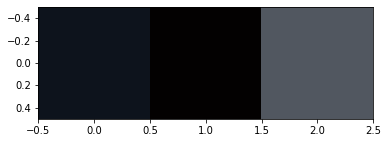

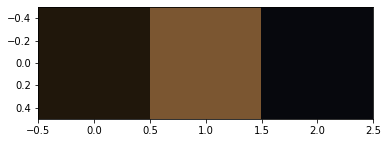

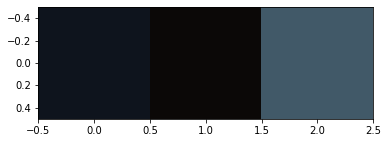

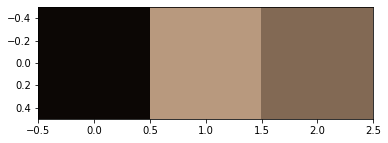

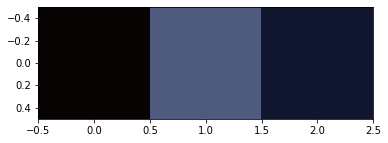

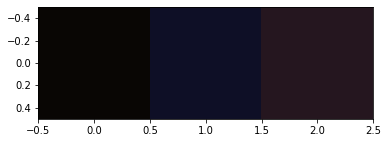

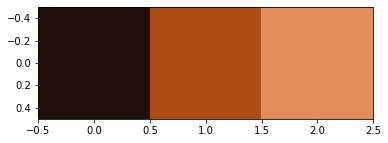

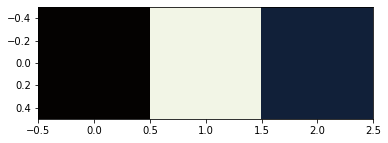

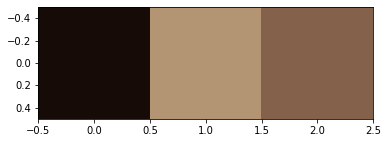

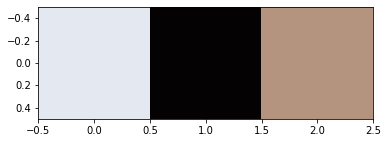

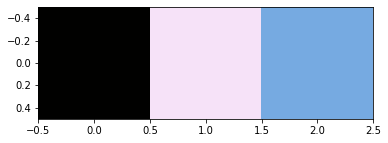

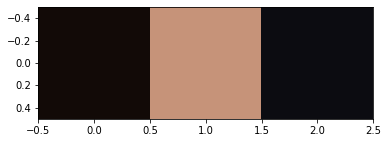

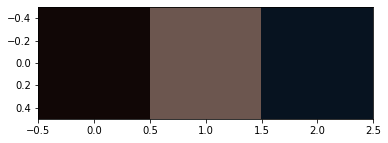

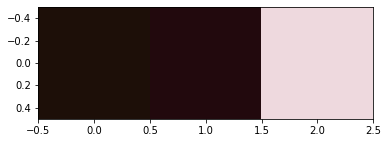

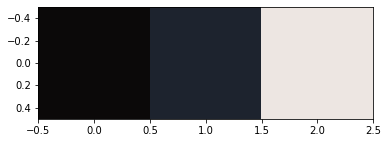

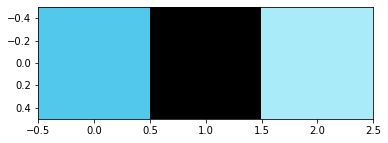

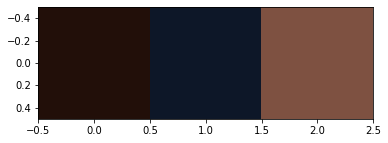

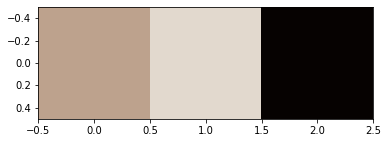

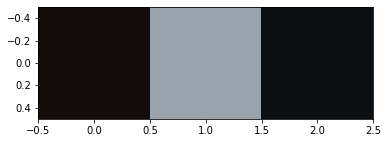

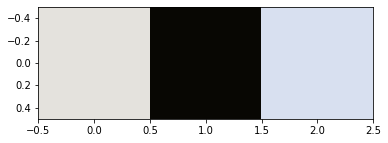

In [35]:
import PIL
import colorgram

def extract_palette(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    img = PIL.Image.fromarray(rgb)
    colors = colorgram.extract(img, 3)
    return np.array([[list(color.rgb) for color in colors]])

for image in sample:
    palette = extract_palette(image)
    plt.imshow(palette)
    plt.show()